# LoC quanitifcation notebook

Takes previously defined thresholds and applies them across population subsets

In [560]:
from homuncu_loc import dataio
import pandas as pd
from tqdm.auto import tqdm
import os
import btrack
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from itertools import chain
import ast
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.weight'] = 'bold'

def convert(s):
    """convert string to float list"""
    # Remove the brackets and extra spaces
    s = s.strip("[]").strip()
    
    # Split the string by comma
    str_list = s.split(", ")
    
    # Convert each string to a float and store it in a new list
    float_list = [float(item) for item in str_list]
    
    return float_list

# Load image information

In [705]:
df = dataio.load_expt_dir()
df

,check ID,ID,expt_type,has_sc_analyses,sc_types,has_tif,has_vsi,has_metadata,image_location,image_fn,...,Plate ID 1,Plate ID 2,condition,Markers,ch0,ch1,ch2,ch3,basename,location
1,112,112,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,Day7_static,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
2,113,113,iAT1_iAT2,2,"['_z_tracks_masks.h5', '_ch1_threshold_quantif...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,Day7_static,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
3,114,114,iAT1_iAT2,1,['_iat2.h5'],TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,,,Day7_static,,,,,,,
4,121,121,iAT1_iAT2,3,"['_ch2_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,Day7_static,DAPI-SPC-PDPN-ZO1,DAPI,SPC,PDPN,ZO1,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
5,122,122,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,21-12-031B,A12456,Day7_static,DAPI-SPC-PDPN-ZO1,DAPI,SPC,PDPN,ZO1,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1510,1510,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat1.h5', '_mphi_sc_measurement...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
84,1511,1511,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat2.h5', '_iat1.h5', '_iat_sc_...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
85,1512,1512,macroph_iAT1_iAT2,5,"['_iat2.h5', '_iat1.h5', '_mphi.h5', '_mphi_sc...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...
86,1513,1513,macroph_iAT1_iAT2,5,"['_mphi.h5', '_iat1.h5', '_iat2.h5', '_mphi_sc...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,...,23-03-001,,,DAPI-ZO1-CD16-MTB,DAPI,ZO1,CD16,MTB,20230802_20X_23-03-001A1_DAPI_ZO-1_CD16_Mtb_Mu...,smb://data2.thecrick.org/lab-gutierrezm/scratc...


In [706]:
fns = """20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434
20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1435
20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1436
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1438
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1439
20230801_20X_23-03-011B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1440
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1441
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1442
20230801_20X_23-03-002A5_DAPI_NKX201_PDPN_ZO-1_Multichannel Z-Stack_20230801_1443
20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1444
20230801_20X_23-03-002A6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1445
20230801_20X_23-03-002B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1448
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1449
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1450
20230801_20X_23-03-002B6_DAPI_SP-C_PDPN_ZO-1_Multichannel Z-Stack_20230801_1451
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_113
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_114
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_121
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_122
20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_123
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_194
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_195
20x_21-12-029A_A3456_Multichannel Z-Stack_20220818_196
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_235
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_236
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_237
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_244
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_245
20x_21-12-028A_A23456_Multichannel Z-Stack_20220818_246
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_284
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_286
20x_21-12-029B_A12346_Multichannel Z-Stack_20220819_287"""
fns = fns.splitlines()
# fns

### Add sc_data_path to df and filter main df

In [749]:
# filter df
df = df[df['image_fn'].isin(fns)]
# Filter df to keep only the rows where 'threshold applied?' is TRUE
df = df[df['threshold applied?'].str.upper() == 'TRUE']
# Initialize a new column for single cell data paths
df['sc_data_path'] = None

for fn in tqdm(fns, total=len(fns)):
    matching_rows = df[df['image_fn'] == fn]
    if not matching_rows.empty:
        image_dir = matching_rows.iloc[0]['image_location']
        sc_base_dir = image_dir.replace('images', 'sc_analyses') 
        sc_fn = None
        
        # Check if the specific file exists, and set sc_fn accordingly, prioritise iat2 fns
        if os.path.exists(os.path.join(sc_base_dir, fn + '_iat2.h5')):
            sc_fn = fn + '_iat2.h5'
            obj_type = 'obj_type_2'
            
        elif os.path.exists(os.path.join(sc_base_dir, fn + '_z_tracks_masks.h5')):
            sc_fn = fn + '_z_tracks_masks.h5'
            obj_type = 'obj_type_1'

        else:
            print(f'Single cell data not found for {fn}')
            continue  # Skip to the next iteration of the loop
        
        sc_data_path = os.path.join(sc_base_dir, sc_fn)
        df.at[matching_rows.index[0], 'sc_data_path'] = sc_data_path

        # Load the tracks
        with btrack.io.HDF5FileHandler(sc_data_path, 'r', obj_type=obj_type) as reader:
            tracks = [t for t in reader.tracks if len(t) >= 3]

        image_ID = matching_rows['ID'].iloc[0]

        # Store the tracks in the dictionary using the ID as the key
        tracks_dict[image_id] = tracks

        index = matching_rows.index[0]

        # # Calculate single-cell intensities for each channel
        # ch1_sc_intensities = [np.nanmean(t.properties['mean_intensity'][:,1]) for t in tracks]
        # ch2_sc_intensities = [np.nanmean(t.properties['mean_intensity'][:,2]) for t in tracks]
        # Calculate single-cell intensities for each channel
        ch1_sc_intensities = [np.nanmax(t.properties['mean_intensity'][:,1]) for t in tracks]
        ch2_sc_intensities = [np.nanmax(t.properties['mean_intensity'][:,2]) for t in tracks]
        
        # Add the single-cell intensities to the original DataFrame
        df.at[index, 'ch1_sc_intensities'] = str(ch1_sc_intensities)
        df.at[index, 'ch2_sc_intensities'] = str(ch2_sc_intensities)

  0%|          | 0/33 [00:00<?, ?it/s]

[INFO][2023/11/01 12:03:04 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5...
[INFO][2023/11/01 12:03:04 PM] Loading tracks/obj_type_2
[INFO][2023/11/01 12:03:05 PM] Loading LBEP/obj_type_2
[INFO][2023/11/01 12:03:05 PM] Loading objects/obj_type_2 (52662, 5) (52662 filtered: None)
[INFO][2023/11/01 12:03:05 PM] Closing HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20230801_20X_23-03-011B5_DAPI_NKX2-1_PDPN_ZO-1_Multichannel Z-Stack_20230801_1434_iat2.h5
[INFO][2023/11/01 12:03:06 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared

# Load tracks

In [618]:
# Initialize the dictionary to store the tracks
tracks_dict = {}

# Add new columns for single-cell intensities
df['ch1_sc_intensities'] = None
df['ch2_sc_intensities'] = None


for index, row in tqdm(df.iterrows(), total=len(df)):
    image_id = row['ID']
    sc_data_path = row['sc_data_path']
    
    if pd.isnull(sc_data_path):
        print(f"sc_data_path is missing for ID: {image_id}")
        continue
    
    if 'iat2' in sc_data_path: 
        obj_type = 'obj_type_2'
    elif '_z_tracks_masks' in sc_data_path: 
        obj_type = 'obj_type_1'
    else:
        print(f"Unknown object type for ID: {image_id}")
        continue
    
    # Load the tracks
    with btrack.io.HDF5FileHandler(sc_data_path, 'r', obj_type=obj_type) as reader:
        tracks = [t for t in reader.tracks if len(t) >= 3]
        
    # Store the tracks in the dictionary using the ID as the key
    tracks_dict[image_id] = tracks

    # Calculate single-cell intensities for each channel
    ch1_sc_intensities = [np.nanmax(t.properties['mean_intensity'][:,1]) for t in tracks]
    ch2_sc_intensities = [np.nanmax(t.properties['mean_intensity'][:,2]) for t in tracks]
    
    # Add the single-cell intensities to the original DataFrame
    df.at[index, 'ch1_sc_intensities'] = str(ch1_sc_intensities)
    df.at[index, 'ch2_sc_intensities'] = str(ch2_sc_intensities)

    df['ch1_sc_intensities'] = df['ch1_sc_intensities'].apply(eval)
    df['ch2_sc_intensities'] = df['ch2_sc_intensities'].apply(eval)


  0%|          | 0/33 [00:00<?, ?it/s]

[INFO][2023/10/31 05:35:45 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5...
[INFO][2023/10/31 05:35:45 PM] Loading tracks/obj_type_2
[INFO][2023/10/31 05:35:45 PM] Loading LBEP/obj_type_2
[INFO][2023/10/31 05:35:45 PM] Loading objects/obj_type_2 (27786, 5) (27786 filtered: None)
[INFO][2023/10/31 05:35:46 PM] Closing HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_experiments/DAPI_NKX21_PDPN_ZO1/sc_analyses/20x_21-12-031B_A12456_Multichannel Z-Stack_20220811_112_iat2.h5
[INFO][2023/10/31 05:35:46 PM] Opening HDF file: /run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/iAT1_iAT2_e

# Quantify according to condition

In [685]:
conditions = df['condition'].unique()
conditions

array(['Day7_static', 'Day7_breath', 'Day14_static', 'Day14_breath'],
      dtype=object)

In [686]:
channels = ['SPC', 'PDPN', 'NKX21']
channels

['SPC', 'PDPN', 'NKX21']

In [716]:
channel = 'SPC'
condition = 'Day7_static'

In [689]:
print(df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]['ch1threshold'])


1    300
2    300
Name: ch1threshold, dtype: object


In [690]:
condition, channel

('Day7_static', 'NKX21')

In [691]:
df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]

,check ID,ID,expt_type,has_sc_analyses,sc_types,has_tif,has_vsi,has_metadata,image_location,image_fn,...,Markers,ch0,ch1,ch2,ch3,basename,location,sc_data_path,ch1_sc_intensities,ch2_sc_intensities
1,112,112,iAT1_iAT2,3,"['_ch1_threshold_quantification.png', '_z_trac...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[300.3113, 187.06544, 203.98209, 526.81085, 20...","[727.2303, 373.54083, 362.6595, 410.77414, 570..."
2,113,113,iAT1_iAT2,2,"['_z_tracks_masks.h5', '_ch1_threshold_quantif...",TRUE,TRUE,TRUE,/run/user/30046150/gvfs/smb-share:server=data2...,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,...,DAPI-NKX21-PDPN-ZO1,DAPI,NKX21,PDPN,ZO1,20x_21-12-031B_A12456_Multichannel Z-Stack_202...,,/run/user/30046150/gvfs/smb-share:server=data2...,"[119.960785, 398.2738037109375, 295.35898, 132...","[222.11765, 476.41619873046875, 752.7455, 181...."


In [731]:
conditions

array(['Day7_static', 'Day7_breath', 'Day14_static', 'Day14_breath'],
      dtype=object)

In [737]:
normalized_series = sc_intensities.apply(lambda x: [(i - min(x)) / (max(x) - min(x)) for i in x] if x is not np.nan else np.nan)

SyntaxError: cannot assign to function call (929395790.py, line 1)

In [744]:
norm_sc_ints = []
for sc_ints in sc_intensities:#
    sc_ints = convert(sc_ints)
    norm_sc_ints+=[(i - min(sc_ints))/(max(sc_ints) - min(sc_ints)) for i in sc_ints]
    

<Figure size 640x480 with 0 Axes>

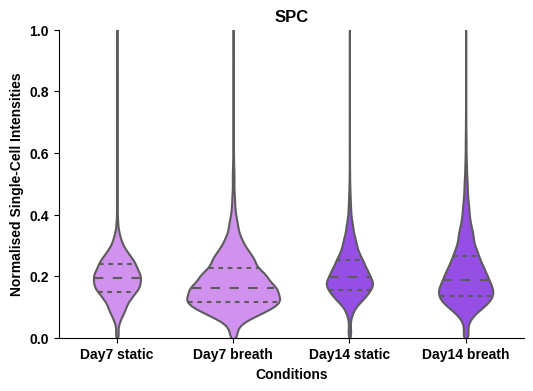

<Figure size 640x480 with 0 Axes>

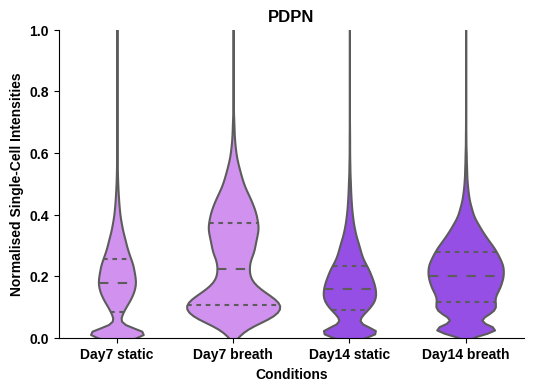

<Figure size 640x480 with 0 Axes>

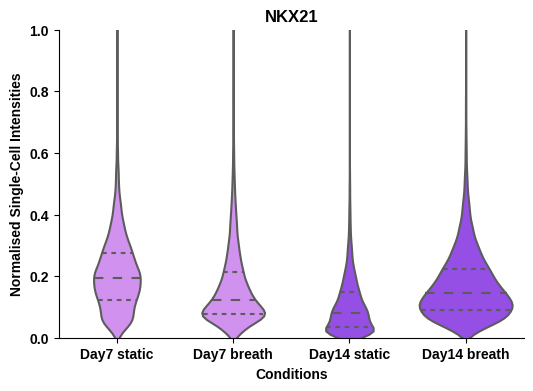

In [753]:
for channel in channels:
    plt.clf()
    
    # Initialize a figure
    plt.figure(figsize=(6, 4))
    
    # Initialize a list to store the data for all conditions and thresholds
    all_data = []
    thresholds = []
    labels = []
    percentages_above_threshold = []
    colors = []
    
    # Define colors for Day7 and Day14
    day7_color = "#d682fe"
    day14_color = "#9336fe"
    
    # Loop through conditions
    for condition in conditions:
        # Filter the DataFrame for the current condition and channel
        df_subset = df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]
        
        # Find the column name for the channel enumeration
        str_channel_enumeration = [col for col in df_subset.columns if df_subset[col].apply(lambda x: channel == str(x)).any()][0]
        
        # Get the threshold for the current condition and channel as a mean of all for that condition
        threshold_series = df_subset[f'{str_channel_enumeration}threshold'].replace('', np.nan).dropna()
        test.append(threshold_series)
    
        if not threshold_series.empty:
            numeric_thresholds = pd.to_numeric(threshold_series.str.extract('(\d+)')[0], errors='coerce')
            threshold = int(numeric_thresholds.mean())
        else:
            threshold = None
        
        # Get the single-cell intensities for the current condition and channel
        sc_intensities = df_subset[f'{str_channel_enumeration}_sc_intensities']
        norm_sc_ints = []
        for sc_ints in sc_intensities:#
            sc_ints = convert(sc_ints)
            norm_sc_ints+=[(i - min(sc_ints))/(max(sc_ints) - min(sc_ints)) for i in sc_ints]
        concatenated_intensities = norm_sc_ints #list(chain(*[ast.literal_eval(intensity_list_str) for intensity_list_str in sc_intensities if intensity_list_str is not np.nan]))
        
        # Calculate the percentage of intensities above the threshold
        if threshold is not None:
            percentage_above = 100 * sum(i > threshold for i in concatenated_intensities) / len(concatenated_intensities)
        else:
            percentage_above = None
            
        
        avg_percentage_above_list = []
        for n, (thresh, sc_ints) in enumerate(zip(threshold_series, sc_intensities)):
            sc_ints = convert_string_to_float_list(sc_ints)
            thresh = int(thresh)
            percentage_positive = 100 * sum(i >= thresh for i in sc_ints) / len(sc_ints)
            # print(condition, channel, thresh, n, percentage_positive)
            avg_percentage_above_list.append(percentage_positive)
            
        avg_percentage_above = np.mean(avg_percentage_above_list)
        # print(condition, channel, "average = ", avg_percentage_above)
        # Store the data, threshold, percentage above threshold and label
        all_data.append(concatenated_intensities)
        thresholds.append(threshold)
        percentages_above_threshold.append(avg_percentage_above)
        condition_label = condition.replace('_', ' ')
        labels.append(f'{condition_label}')
        
        # Set color based on condition
        if "Day7" in condition:
            colors.append(day7_color)
        elif "Day14" in condition:
            colors.append(day14_color)
        else:
            colors.append("gray")  # Default color for other conditions
    
    # Create the violin plot for all conditions
    ax = sns.violinplot(data=all_data, palette=colors,  inner="quartile", scale="count")
    
    # Set y-axis scale and limits
    ax.set_ylim(bottom=0)
    
    # # Add horizontal dashed lines at thresholds and text annotations
    # for i, (threshold, percentage_above, data) in enumerate(zip(thresholds, percentages_above_threshold, all_data)):
    #     if threshold is not None:
    #         ax.axhline(threshold, color='black', linestyle='--', xmin=i/len(thresholds), xmax=(i+1)/len(thresholds), label=f': {threshold}')
            
    #     # Position the percentage text above the highest value of the violin plot
    #     if percentage_above is not None:
    #         y_pos = max(data) + 100  # You can adjust the offset to position the text at the desired height
    #         ax.text(i, y_pos, f'{percentage_above:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
    
    # Add labels and title
    ax.set_xticklabels(labels, fontweight='bold')
    plt.title(f'{channel}', fontweight='bold')
    plt.xlabel('Conditions', fontweight='bold')
    plt.ylabel('Normalised Single-Cell Intensities', fontweight='bold')
    
    # # Add a legend
    # handles, thresh_labels = ax.get_legend_handles_labels()
    # full_labels = [f'{l}{tl}' for l, tl in zip(labels, thresh_labels)]
    # by_label = dict(zip(full_labels, handles))
    # plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')
    
    plt.ylim(0,1)
    
    sns.despine()

    plt.savefig(f'/run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/shared/Lung on Chip/homuncu_loc_image_analysis/results/normalised_sc_intensities_{channel}.svg', bbox_inches = 'tight', dpi = 314)
    # Show the plot
    plt.show()


<Figure size 640x480 with 0 Axes>

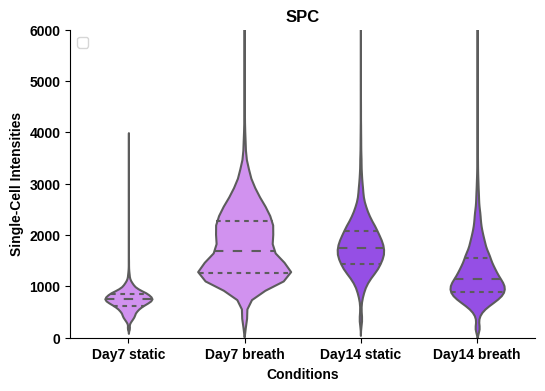

<Figure size 640x480 with 0 Axes>

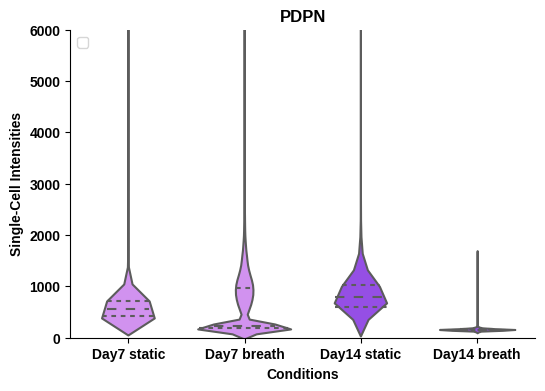

<Figure size 640x480 with 0 Axes>

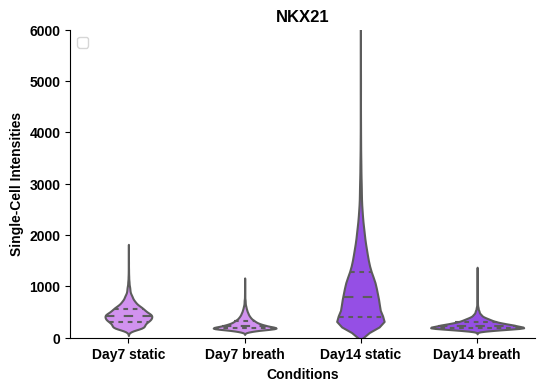

In [724]:
for channel in channels:
    plt.clf()
    
    # Initialize a figure
    plt.figure(figsize=(6, 4))
    
    # Initialize a list to store the data for all conditions and thresholds
    all_data = []
    thresholds = []
    labels = []
    percentages_above_threshold = []
    colors = []
    
    # Define colors for Day7 and Day14
    day7_color = "#d682fe"
    day14_color = "#9336fe"
    
    # Loop through conditions
    for condition in conditions:
        # Filter the DataFrame for the current condition and channel
        df_subset = df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]
        
        # Find the column name for the channel enumeration
        str_channel_enumeration = [col for col in df_subset.columns if df_subset[col].apply(lambda x: channel == str(x)).any()][0]
        
        # Get the threshold for the current condition and channel as a mean of all for that condition
        threshold_series = df_subset[f'{str_channel_enumeration}threshold'].replace('', np.nan).dropna()
        test.append(threshold_series)
    
        if not threshold_series.empty:
            numeric_thresholds = pd.to_numeric(threshold_series.str.extract('(\d+)')[0], errors='coerce')
            threshold = int(numeric_thresholds.mean())
        else:
            threshold = None
        
        # Get the single-cell intensities for the current condition and channel
        sc_intensities = df_subset[f'{str_channel_enumeration}_sc_intensities']
        concatenated_intensities = list(chain(*[ast.literal_eval(intensity_list_str) for intensity_list_str in sc_intensities if intensity_list_str is not np.nan]))
        
        # Calculate the percentage of intensities above the threshold
        if threshold is not None:
            percentage_above = 100 * sum(i > threshold for i in concatenated_intensities) / len(concatenated_intensities)
        else:
            percentage_above = None
            
        
        avg_percentage_above_list = []
        for n, (thresh, sc_ints) in enumerate(zip(threshold_series, sc_intensities)):
            sc_ints = convert_string_to_float_list(sc_ints)
            thresh = int(thresh)
            percentage_positive = 100 * sum(i >= thresh for i in sc_ints) / len(sc_ints)
            # print(condition, channel, thresh, n, percentage_positive)
            avg_percentage_above_list.append(percentage_positive)
            
        avg_percentage_above = np.mean(avg_percentage_above_list)
        # print(condition, channel, "average = ", avg_percentage_above)
        # Store the data, threshold, percentage above threshold and label
        all_data.append(concatenated_intensities)
        thresholds.append(threshold)
        percentages_above_threshold.append(avg_percentage_above)
        condition_label = condition.replace('_', ' ')
        labels.append(f'{condition_label}')
        
        # Set color based on condition
        if "Day7" in condition:
            colors.append(day7_color)
        elif "Day14" in condition:
            colors.append(day14_color)
        else:
            colors.append("gray")  # Default color for other conditions
    
    # Create the violin plot for all conditions
    ax = sns.violinplot(data=all_data, palette=colors,  inner="quartile", scale="count")
    
    # Set y-axis scale and limits
    ax.set_ylim(bottom=0)
    
    # # Add horizontal dashed lines at thresholds and text annotations
    # for i, (threshold, percentage_above, data) in enumerate(zip(thresholds, percentages_above_threshold, all_data)):
    #     if threshold is not None:
    #         ax.axhline(threshold, color='black', linestyle='--', xmin=i/len(thresholds), xmax=(i+1)/len(thresholds), label=f': {threshold}')
            
    #     # Position the percentage text above the highest value of the violin plot
    #     if percentage_above is not None:
    #         y_pos = max(data) + 100  # You can adjust the offset to position the text at the desired height
    #         ax.text(i, y_pos, f'{percentage_above:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
    
    # Add labels and title
    ax.set_xticklabels(labels, fontweight='bold')
    plt.title(f'{channel}', fontweight='bold')
    plt.xlabel('Conditions', fontweight='bold')
    plt.ylabel('Single-Cell Intensities', fontweight='bold')
    
    # Add a legend
    handles, thresh_labels = ax.get_legend_handles_labels()
    full_labels = [f'{l}{tl}' for l, tl in zip(labels, thresh_labels)]
    by_label = dict(zip(full_labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')
    
    plt.ylim(0,6000)
    
    sns.despine()
    # Show the plot
    plt.show()


<Figure size 640x480 with 0 Axes>

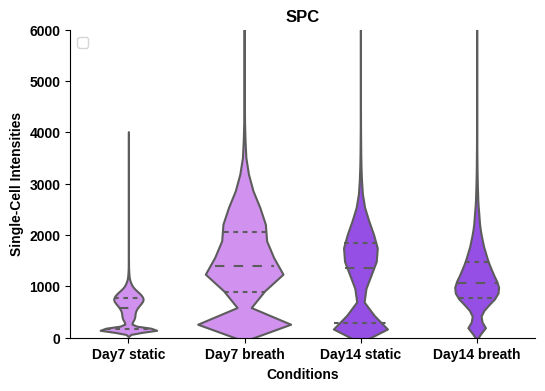

<Figure size 640x480 with 0 Axes>

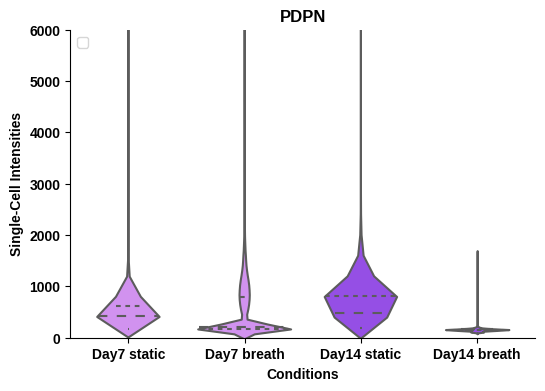

<Figure size 640x480 with 0 Axes>

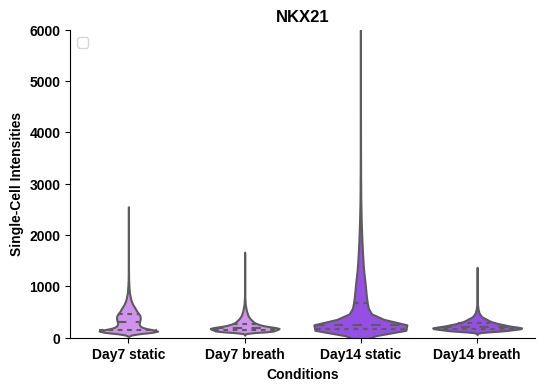

In [721]:
for channel in channels:
    plt.clf()
    
    # Initialize a figure
    plt.figure(figsize=(6, 4))
    
    # Initialize a list to store the data for all conditions and thresholds
    all_data = []
    thresholds = []
    labels = []
    percentages_above_threshold = []
    colors = []
    
    # Define colors for Day7 and Day14
    day7_color = "#d682fe"
    day14_color = "#9336fe"
    
    # Loop through conditions
    for condition in conditions:
        # Filter the DataFrame for the current condition and channel
        df_subset = df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]
        
        # Find the column name for the channel enumeration
        str_channel_enumeration = [col for col in df_subset.columns if df_subset[col].apply(lambda x: channel == str(x)).any()][0]
        
        # Get the threshold for the current condition and channel as a mean of all for that condition
        threshold_series = df_subset[f'{str_channel_enumeration}threshold'].replace('', np.nan).dropna()
        test.append(threshold_series)
    
        if not threshold_series.empty:
            numeric_thresholds = pd.to_numeric(threshold_series.str.extract('(\d+)')[0], errors='coerce')
            threshold = int(numeric_thresholds.mean())
        else:
            threshold = None
        
        # Get the single-cell intensities for the current condition and channel
        sc_intensities = df_subset[f'{str_channel_enumeration}_sc_intensities']
        concatenated_intensities = list(chain(*[ast.literal_eval(intensity_list_str) for intensity_list_str in sc_intensities if intensity_list_str is not np.nan]))
        
        # Calculate the percentage of intensities above the threshold
        if threshold is not None:
            percentage_above = 100 * sum(i > threshold for i in concatenated_intensities) / len(concatenated_intensities)
        else:
            percentage_above = None
            
        
        avg_percentage_above_list = []
        for n, (thresh, sc_ints) in enumerate(zip(threshold_series, sc_intensities)):
            sc_ints = convert_string_to_float_list(sc_ints)
            thresh = int(thresh)
            percentage_positive = 100 * sum(i >= thresh for i in sc_ints) / len(sc_ints)
            # print(condition, channel, thresh, n, percentage_positive)
            avg_percentage_above_list.append(percentage_positive)
            
        avg_percentage_above = np.mean(avg_percentage_above_list)
        # print(condition, channel, "average = ", avg_percentage_above)
        # Store the data, threshold, percentage above threshold and label
        all_data.append(concatenated_intensities)
        thresholds.append(threshold)
        percentages_above_threshold.append(avg_percentage_above)
        condition_label = condition.replace('_', ' ')
        labels.append(f'{condition_label}')
        
        # Set color based on condition
        if "Day7" in condition:
            colors.append(day7_color)
        elif "Day14" in condition:
            colors.append(day14_color)
        else:
            colors.append("gray")  # Default color for other conditions
    
    # Create the violin plot for all conditions
    ax = sns.violinplot(data=all_data, palette=colors,  inner="quartile", scale="count")
    
    # Set y-axis scale and limits
    ax.set_ylim(bottom=0)
    
    # # Add horizontal dashed lines at thresholds and text annotations
    # for i, (threshold, percentage_above, data) in enumerate(zip(thresholds, percentages_above_threshold, all_data)):
    #     if threshold is not None:
    #         ax.axhline(threshold, color='black', linestyle='--', xmin=i/len(thresholds), xmax=(i+1)/len(thresholds), label=f': {threshold}')
            
    #     # Position the percentage text above the highest value of the violin plot
    #     if percentage_above is not None:
    #         y_pos = max(data) + 100  # You can adjust the offset to position the text at the desired height
    #         ax.text(i, y_pos, f'{percentage_above:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
    
    # Add labels and title
    ax.set_xticklabels(labels, fontweight='bold')
    plt.title(f'{channel}', fontweight='bold')
    plt.xlabel('Conditions', fontweight='bold')
    plt.ylabel('Single-Cell Intensities', fontweight='bold')
    
    # Add a legend
    handles, thresh_labels = ax.get_legend_handles_labels()
    full_labels = [f'{l}{tl}' for l, tl in zip(labels, thresh_labels)]
    by_label = dict(zip(full_labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')
    
    plt.ylim(0,6000)
    
    sns.despine()
    # Show the plot
    plt.show()


Day7_static SPC 250 0 98.82457702582369
Day7_static SPC 250 1 99.27826784282277
Day7_static SPC 250 2 98.61281826163301
Day7_static SPC average =  98.9052210434265
Day7_breath SPC 550 0 98.58706720977597
Day7_breath SPC 550 1 98.21735111580615
Day7_breath SPC 550 2 98.18130945719082
Day7_breath SPC 1100 3 77.83735478105451
Day7_breath SPC 1100 4 74.66266866566717
Day7_breath SPC 1100 5 68.52375565610859
Day7_breath SPC average =  86.00158448093386
Day14_static SPC 500 0 98.93867924528301
Day14_static SPC 600 1 98.68645513476629
Day14_static SPC 600 2 98.55019269590751
Day14_static SPC average =  98.72510902531894
Day14_breath SPC 500 0 86.89991863303499
Day14_breath SPC 650 1 92.09713024282561
Day14_breath SPC 1000 2 64.41203281677302
Day14_breath SPC 1000 3 62.41312741312741
Day14_breath SPC 1000 4 62.07830070803832
Day14_breath SPC average =  73.58010196275987


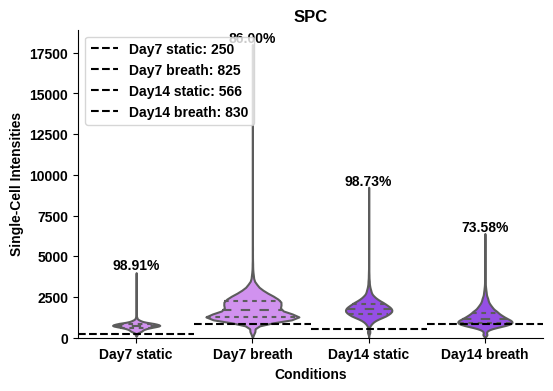

Day7_static PDPN 250 0 99.73249027237354
Day7_static PDPN 250 1 98.11898512685914
Day7_static PDPN 220 2 98.77114870881567
Day7_static PDPN 200 3 98.95749799518845
Day7_static PDPN 200 4 98.82352941176471
Day7_static PDPN average =  98.8807303030003
Day7_breath PDPN 250 0 98.96894093686355
Day7_breath PDPN 250 1 98.41542321404991
Day7_breath PDPN 250 2 98.25125909345272
Day7_breath PDPN 190 3 53.24074074074074
Day7_breath PDPN 135 4 88.71617731721359
Day7_breath PDPN 150 5 90.56039173014146
Day7_breath PDPN 170 6 84.85254691689008
Day7_breath PDPN 170 7 78.76061969015493
Day7_breath PDPN 170 8 68.60859728506787
Day7_breath PDPN average =  84.48607743606387
Day14_static PDPN 350 0 90.66440349175558
Day14_static PDPN 350 1 90.36375239310784
Day14_static PDPN 350 2 98.0121293800539
Day14_static PDPN 350 3 97.09996588195155
Day14_static PDPN 350 4 98.44008074876125
Day14_static PDPN average =  94.91606637912602
Day14_breath PDPN 170 0 15.654813529921944
Day14_breath PDPN 170 1 16.937581274

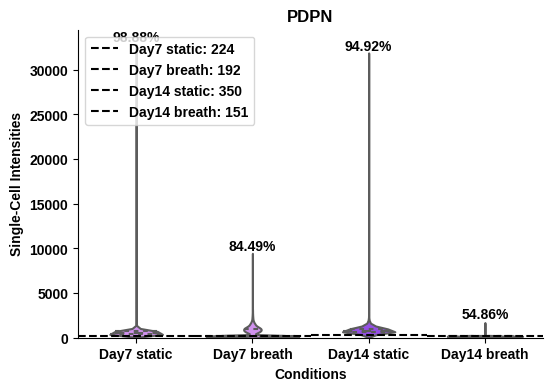

Day7_static NKX21 300 0 76.4591439688716
Day7_static NKX21 300 1 76.83727034120734
Day7_static NKX21 average =  76.64820715503947
Day7_breath NKX21 150 0 98.87566137566138
Day7_breath NKX21 135 1 90.18422567645365
Day7_breath NKX21 175 2 87.21436343852012
Day7_breath NKX21 average =  92.09141683021171
Day14_static NKX21 450 0 70.61105722599417
Day14_static NKX21 450 1 74.00553073814082
Day14_static NKX21 average =  72.3082939820675
Day14_breath NKX21 200 0 64.50563746747615
Day14_breath NKX21 200 1 67.62028608582575
Day14_breath NKX21 200 2 73.79425703930862
Day14_breath NKX21 160 3 91.87437686939182
Day14_breath NKX21 average =  74.44863936550058


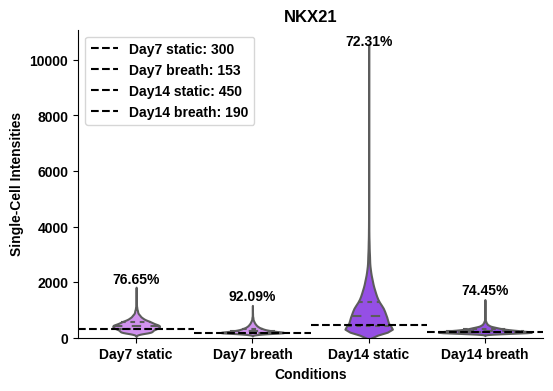

In [725]:
for channel in channels:
  
    # Initialize a figure
    plt.figure(figsize=(6, 4))
    
    # Initialize a list to store the data for all conditions and thresholds
    all_data = []
    thresholds = []
    labels = []
    percentages_above_threshold = []
    colors = []
    
    # Define colors for Day7 and Day14
    day7_color = "#d682fe"
    day14_color = "#9336fe"
    
    # Loop through conditions
    for condition in conditions:
        # Filter the DataFrame for the current condition and channel
        df_subset = df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]
        
        # Find the column name for the channel enumeration
        str_channel_enumeration = [col for col in df_subset.columns if df_subset[col].apply(lambda x: channel == str(x)).any()][0]
        
        # Get the threshold for the current condition and channel as a mean of all for that condition
        threshold_series = df_subset[f'{str_channel_enumeration}threshold'].replace('', np.nan).dropna()
        test.append(threshold_series)

        if not threshold_series.empty:
            numeric_thresholds = pd.to_numeric(threshold_series.str.extract('(\d+)')[0], errors='coerce')
            threshold = int(numeric_thresholds.mean())
        else:
            threshold = None
        
        # Get the single-cell intensities for the current condition and channel
        sc_intensities = df_subset[f'{str_channel_enumeration}_sc_intensities']
        concatenated_intensities = list(chain(*[ast.literal_eval(intensity_list_str) for intensity_list_str in sc_intensities if intensity_list_str is not np.nan]))
        
        # Calculate the percentage of intensities above the threshold
        if threshold is not None:
            percentage_above = 100 * sum(i > threshold for i in concatenated_intensities) / len(concatenated_intensities)
        else:
            percentage_above = None
            
        
        avg_percentage_above_list = []
        for n, (thresh, sc_ints) in enumerate(zip(threshold_series, sc_intensities)):
            sc_ints = convert_string_to_float_list(sc_ints)
            thresh = int(thresh)
            percentage_positive = 100 * sum(i >= thresh for i in sc_ints) / len(sc_ints)
            print(condition, channel, thresh, n, percentage_positive)
            avg_percentage_above_list.append(percentage_positive)
            
        avg_percentage_above = np.mean(avg_percentage_above_list)
        print(condition, channel, "average = ", avg_percentage_above)
        # Store the data, threshold, percentage above threshold and label
        all_data.append(concatenated_intensities)
        thresholds.append(threshold)
        percentages_above_threshold.append(avg_percentage_above)
        condition_label = condition.replace('_', ' ')
        labels.append(f'{condition_label}')
        
        # Set color based on condition
        if "Day7" in condition:
            colors.append(day7_color)
        elif "Day14" in condition:
            colors.append(day14_color)
        else:
            colors.append("gray")  # Default color for other conditions
    
    # Create the violin plot for all conditions
    ax = sns.violinplot(data=all_data, palette=colors,  inner="quartile", scale="count")
    
    # Set y-axis scale and limits
    ax.set_ylim(bottom=0)
    
    # Add horizontal dashed lines at thresholds and text annotations
    for i, (threshold, percentage_above, data) in enumerate(zip(thresholds, percentages_above_threshold, all_data)):
        if threshold is not None:
            ax.axhline(threshold, color='black', linestyle='--', xmin=i/len(thresholds), xmax=(i+1)/len(thresholds), label=f': {threshold}')
            
        # Position the percentage text above the highest value of the violin plot
        if percentage_above is not None:
            y_pos = max(data) + 100  # You can adjust the offset to position the text at the desired height
            ax.text(i, y_pos, f'{percentage_above:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
    
    # Add labels and title
    ax.set_xticklabels(labels, fontweight='bold')
    plt.title(f'{channel}', fontweight='bold')
    plt.xlabel('Conditions', fontweight='bold')
    plt.ylabel('Single-Cell Intensities', fontweight='bold')
    
    # Add a legend
    handles, thresh_labels = ax.get_legend_handles_labels()
    full_labels = [f'{l}{tl}' for l, tl in zip(labels, thresh_labels)]
    by_label = dict(zip(full_labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')
    
    sns.despine()
    # Show the plot
    plt.show()



Day7_static SPC 250 0 70.22757697456493
Day7_static SPC 250 1 73.24729682595047
Day7_static SPC 250 2 66.31170546475153
Day7_static SPC average =  69.92885975508898
Day7_breath SPC 550 0 74.82962630120572
Day7_breath SPC 550 1 72.4865831842576
Day7_breath SPC 550 2 71.45856767904012
Day7_breath SPC 1100 3 74.41554165294698
Day7_breath SPC 1100 4 71.35125383366407
Day7_breath SPC 1100 5 65.59294214197784
Day7_breath SPC average =  71.68908579884874
Day14_static SPC 500 0 69.14913423943399
Day14_static SPC 600 1 67.45551757384521
Day14_static SPC 600 2 63.05017207027712
Day14_static SPC average =  66.55160796118544
Day14_breath SPC 500 0 58.50197720400093
Day14_breath SPC 650 1 79.5631825273011
Day14_breath SPC 1000 2 60.03855278766311
Day14_breath SPC 1000 3 59.53127578808384
Day14_breath SPC 1000 4 58.97521211112959
Day14_breath SPC average =  63.32204008363571


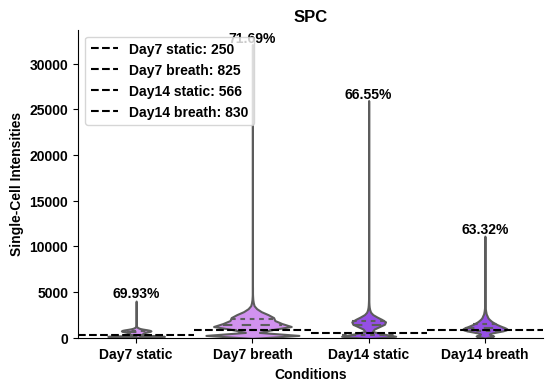

Day7_static PDPN 250 0 92.60024092238858
Day7_static PDPN 250 1 63.19173987863418
Day7_static PDPN 220 2 70.16510486390004
Day7_static PDPN 200 3 73.01185908615277
Day7_static PDPN 200 4 67.14545154366849
Day7_static PDPN average =  73.22287925894882
Day7_breath PDPN 250 0 76.14019321500787
Day7_breath PDPN 250 1 74.12522361359571
Day7_breath PDPN 250 2 72.60592425946757
Day7_breath PDPN 190 3 48.64485981308411
Day7_breath PDPN 135 4 68.81896808827915
Day7_breath PDPN 150 5 70.31860535016531
Day7_breath PDPN 170 6 80.0296345077379
Day7_breath PDPN 170 7 72.830597149558
Day7_breath PDPN 170 8 62.59745588838736
Day7_breath PDPN average =  69.56794020947588
Day14_static PDPN 350 0 43.889739663093415
Day14_static PDPN 350 1 47.04070407040704
Day14_static PDPN 350 2 98.87659012060135
Day14_static PDPN 350 3 68.42301247439956
Day14_static PDPN 350 4 66.48260145499167
Day14_static PDPN average =  64.9425295566986
Day14_breath PDPN 170 0 92.90761580738027
Day14_breath PDPN 170 1 60.57206625161

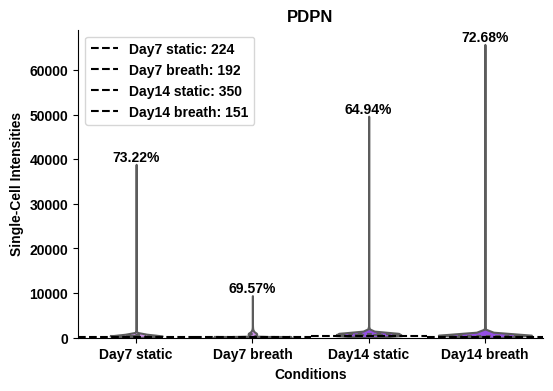

Day7_static NKX21 300 0 63.51746687317157
Day7_static NKX21 300 1 42.24255049361471
Day7_static NKX21 average =  52.88000868339314
Day7_breath NKX21 150 0 95.26479750778816
Day7_breath NKX21 135 1 70.07157769161944
Day7_breath NKX21 175 2 65.31409678388938
Day7_breath NKX21 average =  76.883490661099
Day14_static NKX21 450 0 30.62021439509954
Day14_static NKX21 450 1 35.04217088375504
Day14_static NKX21 average =  32.83119263942729
Day14_breath NKX21 500 0 0.9552473174561633
Day14_breath NKX21 135 1 68.63033008340186
Day14_breath NKX21 135 2 67.39389131297105
Day14_breath NKX21 200 3 53.38707177181832
Day14_breath NKX21 200 4 56.01799775028122
Day14_breath NKX21 200 5 62.30580539656582
Day14_breath NKX21 160 6 80.20607934054611
Day14_breath NKX21 average =  55.556631853291506


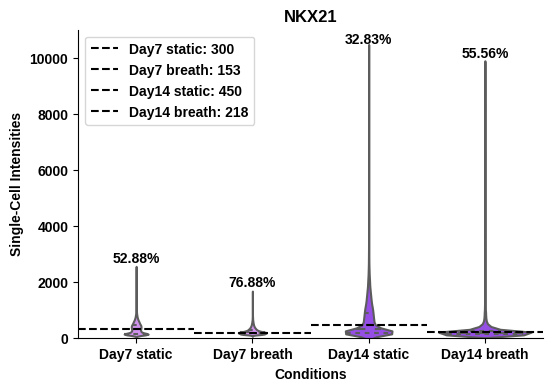

In [700]:
for channel in channels:
  
    # Initialize a figure
    plt.figure(figsize=(6, 4))
    
    # Initialize a list to store the data for all conditions and thresholds
    all_data = []
    thresholds = []
    labels = []
    percentages_above_threshold = []
    colors = []
    
    # Define colors for Day7 and Day14
    day7_color = "#d682fe"
    day14_color = "#9336fe"
    
    # Loop through conditions
    for condition in conditions:
        # Filter the DataFrame for the current condition and channel
        df_subset = df[(df['condition'] == condition) & (df['Markers'].str.contains(channel))]
        
        # Find the column name for the channel enumeration
        str_channel_enumeration = [col for col in df_subset.columns if df_subset[col].apply(lambda x: channel == str(x)).any()][0]
        
        # Get the threshold for the current condition and channel as a mean of all for that condition
        threshold_series = df_subset[f'{str_channel_enumeration}threshold'].replace('', np.nan).dropna()
        test.append(threshold_series)

        if not threshold_series.empty:
            numeric_thresholds = pd.to_numeric(threshold_series.str.extract('(\d+)')[0], errors='coerce')
            threshold = int(numeric_thresholds.mean())
        else:
            threshold = None
        
        # Get the single-cell intensities for the current condition and channel
        sc_intensities = df_subset[f'{str_channel_enumeration}_sc_intensities']
        concatenated_intensities = list(chain(*[ast.literal_eval(intensity_list_str) for intensity_list_str in sc_intensities if intensity_list_str is not np.nan]))
        
        # Calculate the percentage of intensities above the threshold
        if threshold is not None:
            percentage_above = 100 * sum(i > threshold for i in concatenated_intensities) / len(concatenated_intensities)
        else:
            percentage_above = None
            
        
        avg_percentage_above_list = []
        for n, (thresh, sc_ints) in enumerate(zip(threshold_series, sc_intensities)):
            sc_ints = convert_string_to_float_list(sc_ints)
            thresh = int(thresh)
            percentage_positive = 100 * sum(i >= thresh for i in sc_ints) / len(sc_ints)
            print(condition, channel, thresh, n, percentage_positive)
            avg_percentage_above_list.append(percentage_positive)
            
        avg_percentage_above = np.mean(avg_percentage_above_list)
        print(condition, channel, "average = ", avg_percentage_above)
        # Store the data, threshold, percentage above threshold and label
        all_data.append(concatenated_intensities)
        thresholds.append(threshold)
        percentages_above_threshold.append(avg_percentage_above)
        condition_label = condition.replace('_', ' ')
        labels.append(f'{condition_label}')
        
        # Set color based on condition
        if "Day7" in condition:
            colors.append(day7_color)
        elif "Day14" in condition:
            colors.append(day14_color)
        else:
            colors.append("gray")  # Default color for other conditions
    
    # Create the violin plot for all conditions
    ax = sns.violinplot(data=all_data, palette=colors,  inner="quartile", scale="count")
    
    # Set y-axis scale and limits
    ax.set_ylim(bottom=0)
    
    # Add horizontal dashed lines at thresholds and text annotations
    for i, (threshold, percentage_above, data) in enumerate(zip(thresholds, percentages_above_threshold, all_data)):
        if threshold is not None:
            ax.axhline(threshold, color='black', linestyle='--', xmin=i/len(thresholds), xmax=(i+1)/len(thresholds), label=f': {threshold}')
            
        # Position the percentage text above the highest value of the violin plot
        if percentage_above is not None:
            y_pos = max(data) + 100  # You can adjust the offset to position the text at the desired height
            ax.text(i, y_pos, f'{percentage_above:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
    
    # Add labels and title
    ax.set_xticklabels(labels, fontweight='bold')
    plt.title(f'{channel}', fontweight='bold')
    plt.xlabel('Conditions', fontweight='bold')
    plt.ylabel('Single-Cell Intensities', fontweight='bold')
    
    # Add a legend
    handles, thresh_labels = ax.get_legend_handles_labels()
    full_labels = [f'{l}{tl}' for l, tl in zip(labels, thresh_labels)]
    by_label = dict(zip(full_labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')
    
    sns.despine()
    # Show the plot
    plt.show()



In [ ]:
n_positive = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) >= threshold])
n_negative = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) < threshold])
percentage = n_positive / (n_positive+n_negative) *100
sc_intensities = [np.max(t.properties['mean_intensity'][:,channel]) for t in tracks]


## Quantify

Quantification of number of different cell types according to manually set thresholds

#### Print number of positive and negative cells

In [121]:
# channel = 1
n_positive = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) >= threshold])
n_negative = len([t for t in tracks if np.max(t.properties['mean_intensity'][:,channel]) < threshold])
print(f'Number of channel {channel} positive cells: {n_positive}')
print(f'Number of channel {channel} negative cells: {n_negative}')
percentage = n_positive / (n_positive+n_negative) *100
print(f'Percentage of positive cells: {percentage:.2f}%')


Number of channel 2 positive cells: 506
Number of channel 2 negative cells: 4065
Percentage of positive cells: 11.07%


#### Plot the number of cells either side of the threshold

/home/dayn/miniconda3/envs/cellpose/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dayn/miniconda3/envs/cellpose/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


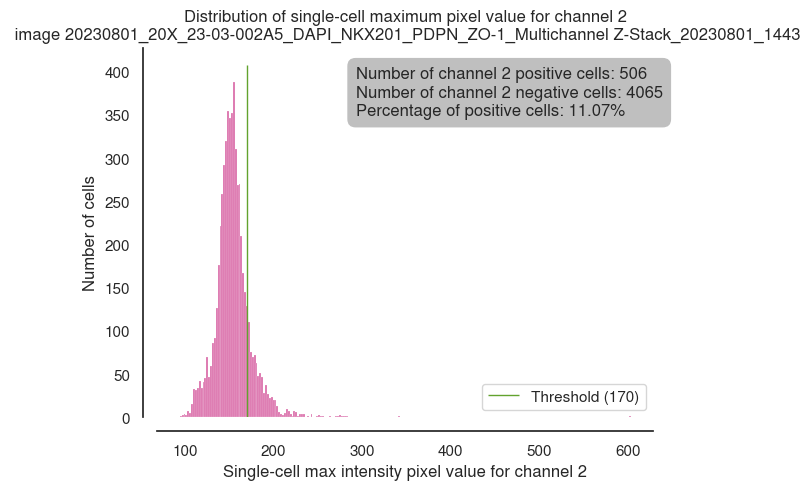

In [122]:
# sc_intensities = [np.max(t.properties['mean_intensity'][:,channel]) for t in tracks]
ax = sns.histplot(sc_intensities)
plt.vlines(x=threshold,
           ymax=ax.get_ylim()[-1],
           ymin=ax.get_ylim()[0],
           color=sns.color_palette('PiYG')[-1],  # my favorite colors :D
           linewidth=1)
sns.despine(offset = 10)
plt.xlabel(f'Single-cell max intensity pixel value for channel {channel}')
plt.ylabel('Number of cells')
plt.legend([f'Threshold ({threshold})'], loc='lower right')
ax.text(0.4, 0.95, 
        f'Number of channel {channel} positive cells: {n_positive}\nNumber of channel {channel} negative cells: {n_negative}\nPercentage of positive cells: {percentage:.2f}%',
        transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='grey', edgecolor='none', alpha=0.5))

image_name = os.path.basename(image_fn).replace('.tif','')
plt.title(f'Distribution of single-cell maximum pixel value for channel {channel}\n image {image_name}')
output_fn = os.path.join(sc_base_dir, f'{image_name}_ch{channel}_threshold_quantification.png')
# plt.xlim(0,5000)
plt.savefig(output_fn, bbox_inches = 'tight', dpi = 314)

# Save out as df/excel

In [ ]:
### define parameters to plot in table
cols = ['Cell ID', f'Max. int. {channels(0).name}', f'Max. int. {channels(1).name}', f'Max. int. {channels(2).name}', f'Max. int. {channels(3).name}', 'Average X', 'Average Y']
### extract some intial measurements
df = pd.DataFrame([(track.ID, np.nanmax(track['mean_intensity-0']),np.nanmax(track['mean_intensity-1']),np.nanmax(track['mean_intensity-2']),np.nanmax(track['mean_intensity-3']), np.mean(track.x), np.mean(track.y)) for track in tracks], columns= cols)